# DSR 21 - Backprop course

## 2. perceptron backprop



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [12]:
class Perceptron:
    def __init__(self, N,alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 /(1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
    
    def predict(self,x):
              # take the dot product between our features and weight matrix
         ### ENTER YOUR CODE HERE
        preds = np.dot(x,self.W)
        preds = self.sigmoid_activation(preds)
         
        
        # return the predictions
        return preds
            
    def fit(self, X, y,epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        losses=[]
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            error = preds - y
            loss = 0.5*np.sum(error ** 2)
            losses.append(loss)
            # the gradient descent update is the dot product between our
            # (1) features and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T,d)#X.T.dot(d)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        return losses

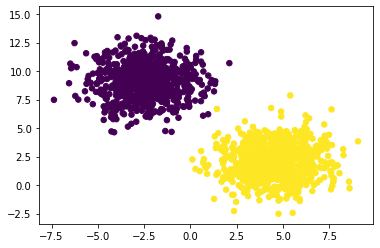

In [13]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1600, n_features=2, centers=2,
cluster_std=1.5, random_state=42)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=30)

# insert a column of 1's as the last entry in the feature
# matrix -- so we can train the bias as part of the weights
X = np.c_[X, np.ones((X.shape[0]))]
          
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [14]:
### Modify Perceptron Class such that you save the training losses and return them 

In [15]:
epochs = 100
alpha = 0.001
# create Perceptron object and train
p = Perceptron(3, alpha=alpha)
losses = p.fit(trainX, trainY, epochs=epochs)

training...
epoch=  1 , loss=  76.58885969872715
epoch=  2 , loss=  11.257871896940323
epoch=  3 , loss=  5.711567880174968
epoch=  4 , loss=  3.8083685060462624
epoch=  5 , loss=  2.846219760370415
epoch=  6 , loss=  2.2655546416011196
epoch=  7 , loss=  1.8791362352657552
epoch=  8 , loss=  1.605668760062923
epoch=  9 , loss=  1.4037085831211247
epoch=  10 , loss=  1.2497580141189446
epoch=  11 , loss=  1.129464312172272
epoch=  12 , loss=  1.0335670566356687
epoch=  13 , loss=  0.9558347374481659
epoch=  14 , loss=  0.8919311307744026
epoch=  15 , loss=  0.8387546341339629
epoch=  16 , loss=  0.7940347437439406
epoch=  17 , loss=  0.7560759933923231
epoch=  18 , loss=  0.7235902175393405
epoch=  19 , loss=  0.6955836661312063
epoch=  20 , loss=  0.6712792426407188
epoch=  21 , loss=  0.6500618325202562
epoch=  22 , loss=  0.6314391641922767
epoch=  23 , loss=  0.6150133325712084
epoch=  24 , loss=  0.6004597756815984
epoch=  25 , loss=  0.5875115465315341
epoch=  26 , loss=  0.57594

In [16]:
# evaluate our model
print("evaluating...")
preds = p.predict(testX)
# apply a step function to threshold the outputs to binary
# class labe|ls
preds[preds <= 0.5] = 0
preds[preds > 0.5] = 1
print(classification_report(testY, preds))

evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       397

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



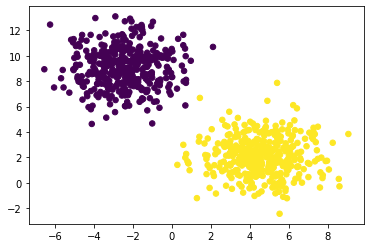

In [9]:
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

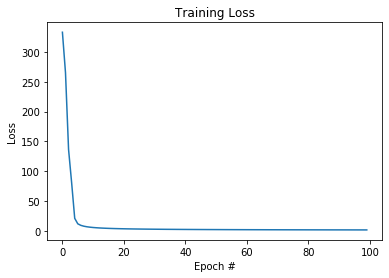

In [10]:
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Gradient Descent can be very slow and wasteful.
#### Especially if you are dealing with big data sets the computation becomes very coastly, yielding huge matrix calculations 
$$ W \cdot{X}   $$
#### the following is a more efficient way to perform GD with faster convergence.

## Stochastic Gradient descent
### instead of updating the weights on an entire epoch we do more updates on mini-batches of data.
### This way we have multiple updates per epoch.

#### implement sgd in our perceptron class (batches of 16)

In [17]:
## enter modified Perceptron Class here
class Perceptron:
    def __init__(self, N,alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 /(1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
    
    def predict(self,x):
              # take the dot product between our features and weight matrix
         ### ENTER YOUR CODE HERE
        preds = np.dot(x,self.W)
        preds = self.sigmoid_activation(preds) 
        
        # return the predictions
        return preds
            
    def fit(self, X, y,epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        
        losses = []
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            x_batched = np.split(X,len(X)/16)
            y_batched = np.split(y,len(y)/16)
            for ind, xb in enumerate(x_batched): 
                preds = self.predict(xb)
                # now that we have our predictions, we need to determine the
                # `error`, which is the difference between our predictions and
                # the true values
                error = preds - y_batched[ind]
                loss = 0.5 * np.sum(error ** 2)
                losses.append(loss)
                # the gradient descent update is the dot product between our
                # (1) features and (2) the error of the sigmoid derivative of
                # our predictions
                d = error * self.sigmoid_deriv(preds)
                gradient = np.dot(xb.T,d)#X.T.dot(d)
                # in the update stage, all we need to do is "nudge" the weight
                # matrix in the negative direction of the gradient (hence the
                # term "gradient descent" by taking a small step towards a set
                # of "more optimal" parameters
                self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
            # shuffling the data the before next epoch
            # so the perceptron sees different batches
            idx = np.random.permutation(len(X))  
            X = X[idx]
            y = y[idx]
        return losses

In [18]:
# create a perceptron object and train it save the losses as losses2 and compare the 
# losses of the current and former percptrons
epochs = 100
alpha = 0.01
p = Perceptron(3, alpha=alpha)
losses2 = p.fit(trainX, trainY, epochs=epochs)

training...
epoch=  1 , loss=  0.022442554979652266
epoch=  2 , loss=  0.005126660350613831
epoch=  3 , loss=  0.47353411721338773
epoch=  4 , loss=  0.024148724370004957
epoch=  5 , loss=  0.013419931001929949
epoch=  6 , loss=  0.000656930300964937
epoch=  7 , loss=  0.09482398919975457
epoch=  8 , loss=  0.0011775627639055136
epoch=  9 , loss=  0.04606668972325015
epoch=  10 , loss=  0.002259185059099211
epoch=  11 , loss=  0.0007574488489123706
epoch=  12 , loss=  0.0005691885564422321
epoch=  13 , loss=  0.060426231710324005
epoch=  14 , loss=  0.005025978611621692
epoch=  15 , loss=  0.08421910849127408
epoch=  16 , loss=  0.012805353577573687
epoch=  17 , loss=  0.00024369546728131004
epoch=  18 , loss=  0.00016747131517720642
epoch=  19 , loss=  7.955458823847795e-05
epoch=  20 , loss=  0.032190979094680786
epoch=  21 , loss=  0.03695064736808483
epoch=  22 , loss=  0.0008127293080942996
epoch=  23 , loss=  0.016315047804430795
epoch=  24 , loss=  0.0015015906392755885
epoch=  

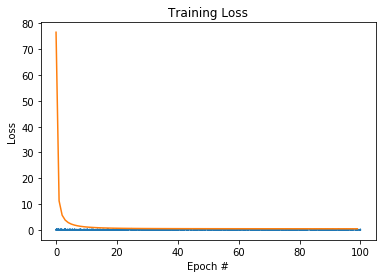

In [19]:
#plot the losses of both perceptrons
plt.plot(np.arange(0, len(losses2))/50, losses2)
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

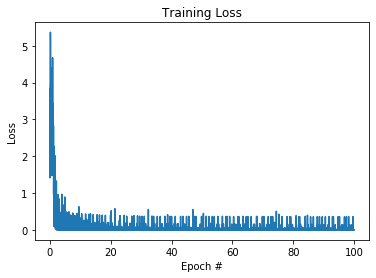

In [14]:

plt.plot(np.arange(0, len(losses2))/50, losses2)

plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()